## 📂 Data Loading

In [ ]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn and XGBoost tools
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [2]:
# Download FordA training and test files from Google Drive
# Download FordA_TRAIN.tsv
!gdown 1ZJkoYmYBjUEcTPnW00gMfiJ9cTltb-II

# Download FordA_TEST.tsv
!gdown 1PPZ0IPpVIWymL1tf0YEud2fuJGK-0FVI

Downloading...
From: https://drive.google.com/uc?id=1ZJkoYmYBjUEcTPnW00gMfiJ9cTltb-II
To: e:\AIO2024\AIO2024_Projects\Module_3\FordA_TEST.tsv

  0%|          | 0.00/7.36M [00:00<?, ?B/s]
  7%|▋         | 524k/7.36M [00:00<00:02, 2.50MB/s]
 28%|██▊       | 2.10M/7.36M [00:00<00:01, 3.66MB/s]
 43%|████▎     | 3.15M/7.36M [00:02<00:04, 916kB/s] 
 57%|█████▋    | 4.19M/7.36M [00:03<00:02, 1.26MB/s]
 71%|███████   | 5.24M/7.36M [00:03<00:01, 1.51MB/s]
 85%|████████▌ | 6.29M/7.36M [00:04<00:00, 1.15MB/s]
100%|██████████| 7.36M/7.36M [00:05<00:00, 1.62MB/s]
100%|██████████| 7.36M/7.36M [00:05<00:00, 1.45MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PPZ0IPpVIWymL1tf0YEud2fuJGK-0FVI
To: e:\AIO2024\AIO2024_Projects\Module_3\FordA_TRAIN.tsv

  0%|          | 0.00/20.1M [00:00<?, ?B/s]
  3%|▎         | 524k/20.1M [00:00<00:06, 3.22MB/s]
 10%|█         | 2.10M/20.1M [00:00<00:04, 4.32MB/s]
 13%|█▎        | 2.62M/20.1M [00:01<00:07, 2.25MB/s]
 16%|█▌        | 3.15M/20.1M [00:01<00:06, 2

In [3]:
# Define a function to read UCR time series files
def read_ucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]        # First column is the label
    x = data[:, 1:]       # Remaining columns are features
    return x, y.astype(int)

In [4]:
# Load train and test data
x_train, y_train = read_ucr("FordA_TRAIN.tsv")
x_test, y_test = read_ucr("FordA_TEST.tsv")

## 🔍 Data Exploring & Preprocessing

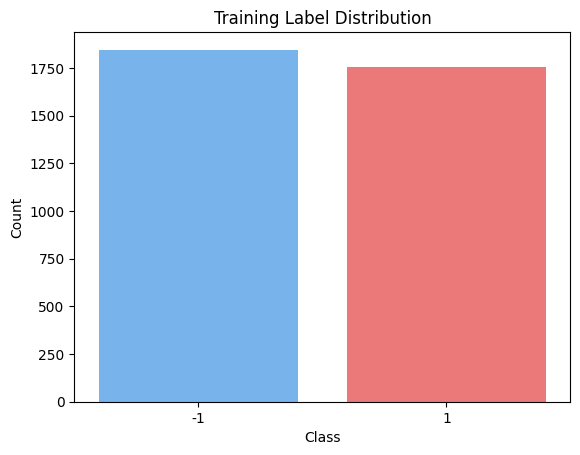

In [5]:
# Visualize label distribution
sns.countplot(x=y_train, hue=y_train, palette={-1: "#66b3ff", 1: "#ff6666"}, legend=False)
plt.title("Training Label Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

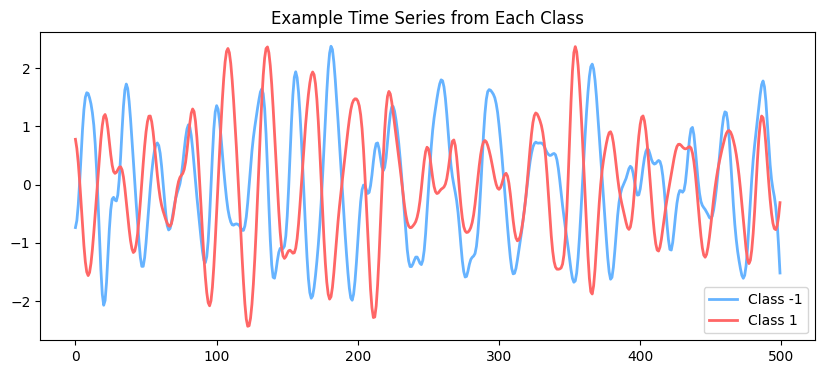

In [ ]:
# Plot one example time series from each class
classes = np.unique(np.concatenate((y_train, y_test)))
plt.figure(figsize=(10, 4))
colors = {-1: "#66b3ff", 1: "#ff6666"}
for c in classes:
    sample = x_train[y_train == c][0]
    plt.plot(sample, label=f"Class {c}", color=colors[c], alpha=1, linewidth=2)
plt.legend(loc="best")
plt.title("Example Time Series from Each Class")
plt.show()

In [6]:
# Feature scaling (StandardScaler)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

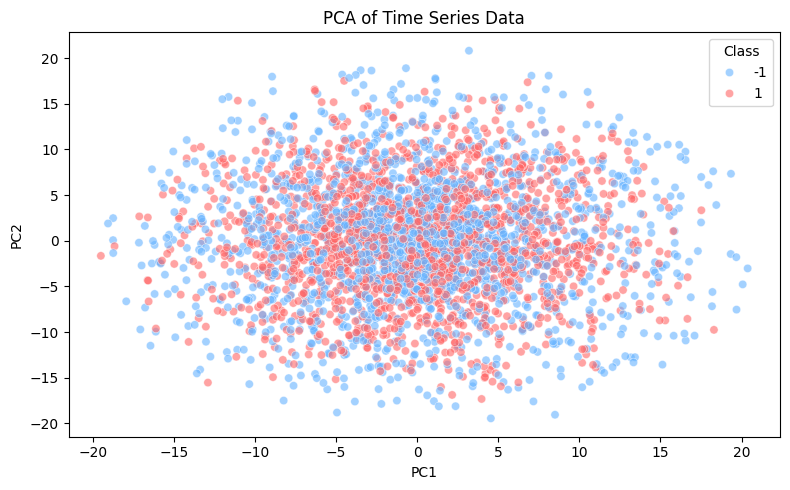

In [7]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=x_train_pca[:, 0], y=x_train_pca[:, 1], hue=y_train, palette={-1: "#66b3ff", 1: "#ff6666"}, alpha=0.6)
plt.title("PCA of Time Series Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Class")
plt.tight_layout()
plt.show()

## 🚀 Training XGBoost Model

In [10]:
# Convert labels from -1 to 0 for binary classification
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

# Initialize and train the XGBoost classifier
xgb_model = XGBClassifier(n_estimators=200, random_state=42)
xgb_model.fit(x_train, y_train)

# Generate predictions
y_pred = xgb_model.predict(x_test)

## 📊 Evaluating XGBoost Model

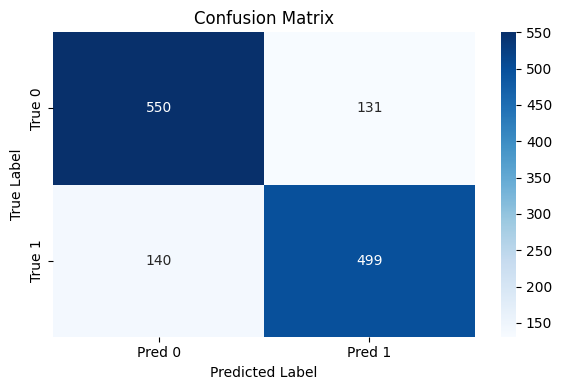

In [11]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["True 0", "True 1"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


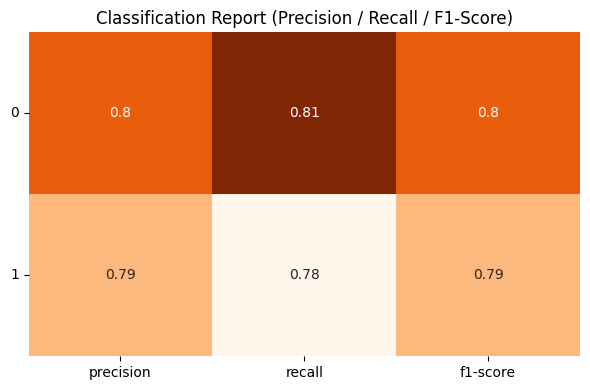

In [12]:
# Classification Report
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df[["precision", "recall", "f1-score"]].round(2)

# Plot classification report as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(report_df.iloc[:2], annot=True, cmap="Oranges", cbar=False)
plt.title("Classification Report (Precision / Recall / F1-Score)")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


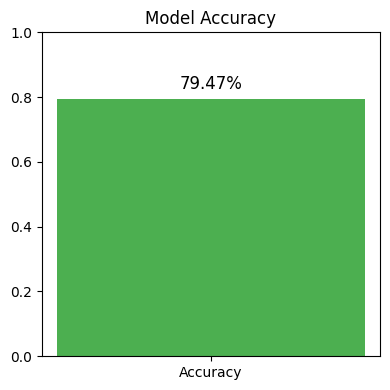

In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot accuracy as a bar chart
plt.figure(figsize=(4, 4))
plt.bar(["Accuracy"], [accuracy], color="#4CAF50")
plt.ylim(0, 1)
plt.text(0, accuracy + 0.03, f"{accuracy:.2%}", ha='center', fontsize=12)
plt.title("Model Accuracy")
plt.tight_layout()
plt.show()


## ⚖️ Comparison of XGBoost and Other Models

In [ ]:
# Define and evaluate multiple models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(n_estimators=200, random_state=42)
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [15]:
# Evaluate models using cross-validation
model_scores = {}
for name, clf in models.items():
    scores = cross_val_score(clf, x_train, y_train, cv=cv, scoring='accuracy')
    model_scores[name] = scores.mean()

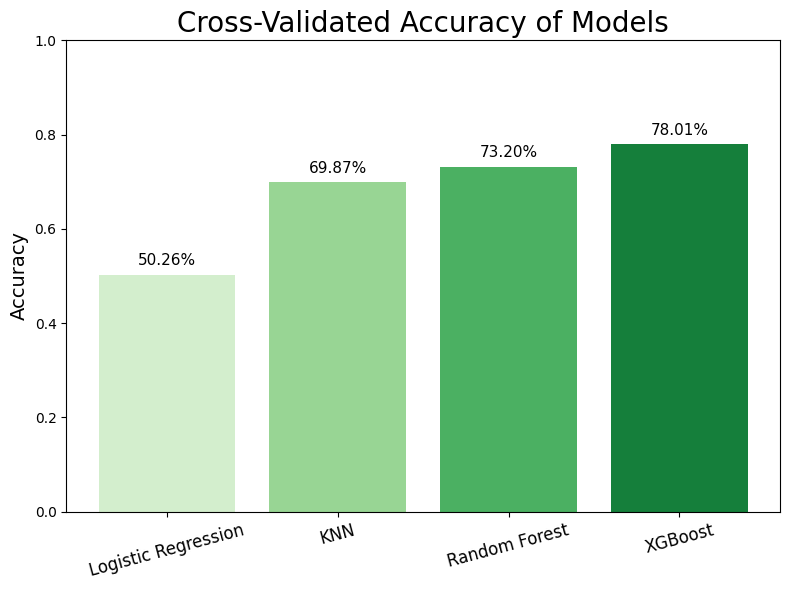

In [16]:
# Sorted model scores
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])
model_names, accuracies = zip(*sorted_scores)

# Use modern gradient color
colors = sns.color_palette("Greens", len(accuracies))

# Plot bar chart using matplotlib for full control
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, accuracies, color=colors)

# Annotate accuracy on top
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, acc + 0.02, f"{acc:.2%}",
             ha='center', fontsize=11)

# Customize appearance
plt.title("Cross-Validated Accuracy of Models", fontsize=20)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim(0, 1.0)
plt.xticks(rotation=15, fontsize=12)
plt.tight_layout()
plt.show()
